In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# dataw from csv numpy
data = np.genfromtxt('../DATA/Table_Data.csv', delimiter=',', skip_header=1)
print(data)

[[  0.   124.6   45.6 ]
 [ 10.   120.3    1.5 ]
 [ 15.   118.3    1.3 ]
 [ 20.   114.6    2.  ]
 [ 25.   116.5    1.8 ]
 [ 30.   117.2    1.3 ]
 [ 35.    97.1    0.5 ]
 [ 40.    73.1    0.8 ]
 [ 45.    29.1    1.4 ]
 [ 50.     5.4    2.5 ]
 [ 55.     3.     3.3 ]
 [ 60.     1.2    3.18]
 [ 65.    23.8    7.13]
 [ 70.    72.     8.9 ]
 [ 75.    86.9   12.3 ]
 [ 80.   101.3   16.  ]]


In [47]:
x = data[1:, 0] #true
y = np.sqrt(data[1:, 1]/data[0,1]) #true
print(x, y)
print(data[0,1])


[10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80.] [0.98259329 0.9743912  0.95903242 0.96694983 0.96985048 0.88277616
 0.76594867 0.48326737 0.20817945 0.1551678  0.09813673 0.43704832
 0.76016388 0.83512381 0.90166602]
124.6


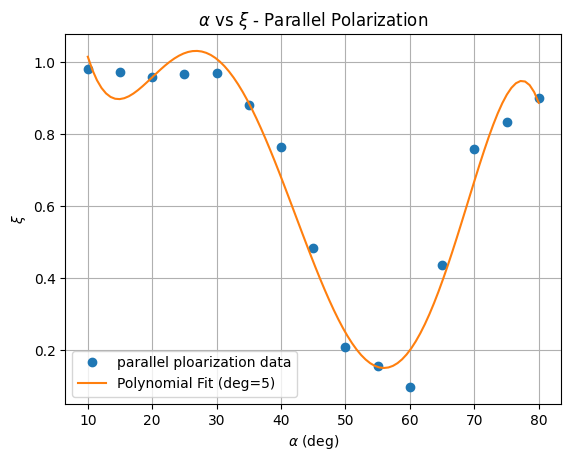

In [ ]:
n = 5
def polynomial_fit_and_plot( n, save_path="../plots/polynomial_fit.png"):
    """
    Perform a polynomial fit and plot the results.

    Parameters:
    n (int): The degree of the polynomial fit.
    save_path (str): The file path to save the plot.
    """
    x = data[1:, 0] #true
    xsi_paral = np.sqrt(data[1:, 1]/data[0,1]) #true
    # Perform polynomial fit
    coefficients = np.polyfit(x, xsi_paral, n)
    poly_func = np.poly1d(coefficients)

    # Generate y values for the fitted polynomial line
    x_fit = np.linspace(np.min(x), np.max(x), 100)
    fitted_y = poly_func(x_fit)

    # Plot the data and the polynomial fit
    plt.plot(x, xsi_paral, 'o', label='parallel ploarization data')
    plt.plot(x_fit, fitted_y, label=f'Polynomial Fit (deg={n})')
    plt.xlabel(r"$\alpha$ (deg)")
    plt.ylabel(r"$\xi$")  # Added Y-axis label
    plt.legend()  # Added legend to distinguish plots
    plt.title(r"$\alpha$ vs $\xi$ - Parallel Polarization")  # Added title to the plot
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()

# Example usage
polynomial_fit_and_plot( n)

In [61]:
data[0,2], \
data[1:,2]/data[0,2] 

(np.float64(45.6),
 array([0.03289474, 0.02850877, 0.04385965, 0.03947368, 0.02850877,
        0.01096491, 0.01754386, 0.03070175, 0.05482456, 0.07236842,
        0.06973684, 0.15635965, 0.19517544, 0.26973684, 0.35087719]))

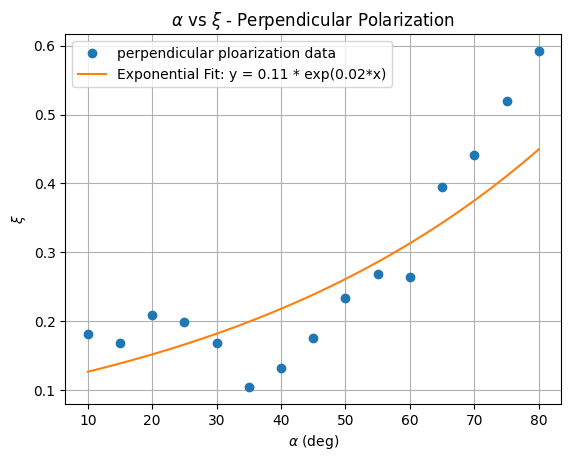

In [ ]:
def exponential_fit_func():

    xsi_perp = np.sqrt(data[1:, 2] / data[0, 2]) #true

    log_y = np.log(xsi_perp)

    coefficients_exp = np.polyfit(x, log_y, 1)
    b_exp = coefficients_exp[0] # slope (b)
    log_a_exp = coefficients_exp[1] # intercept (log_a)
    a_exp = np.exp(log_a_exp) # Calculate a from log(a)

    x_fit_exp = np.linspace(np.min(x), np.max(x), 100)
    fitted_y_exp = a_exp * np.exp(b_exp * x_fit_exp)

    plt.plot(x, xsi_perp, 'o', label='perpendicular ploarization data')
    plt.plot(x_fit_exp, fitted_y_exp, label=f'Exponential Fit: y = {a_exp:.2f} * exp({b_exp:.2f}*x)')
    plt.xlabel(r"$\alpha$ (deg)")
    plt.ylabel(r"$\xi$") 
    plt.grid(True)
    plt.savefig("../plots/exponential_fit.png")
    plt.legend()
    plt.title(r"$\alpha$ vs $\xi$ - Perpendicular Polarization") # Added title to the plot
exponential_fit_func()

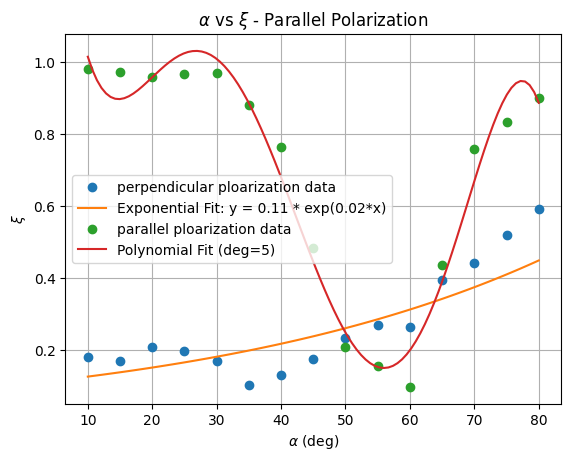

In [52]:
exponential_fit_func()
polynomial_fit_and_plot( n)

In [62]:
#print table of data and xsi_perp and xsi_paral 
import pandas as pd
df = pd.DataFrame(data[:, :])

df.columns = ['alpha', 'paral_i', 'perp_i']
df['xsi_paral'] = np.sqrt(df['paral_i']/data[0,1])
df['xsi_perp'] = np.sqrt(df['perp_i']/data[0,2])


df 

,alpha,paral_i,perp_i,xsi_paral,xsi_perp
0,0.0,124.6,45.60,1.000000,1.000000
1,10.0,120.3,1.50,0.982593,0.181369
2,15.0,118.3,1.30,0.974391,0.168845
3,20.0,114.6,2.00,0.959032,0.209427
4,25.0,116.5,1.80,0.966950,0.198680
5,30.0,117.2,1.30,0.969850,0.168845
6,35.0,97.1,0.50,0.882776,0.104713
7,40.0,73.1,0.80,0.765949,0.132453
8,45.0,29.1,1.40,0.483267,0.175219
9,50.0,5.4,2.50,0.208179,0.234146
